In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [2]:
h = 6.63*10**-34
c = 3*10**8
k = 1.38*10**-23
T = 2700
l = np.linspace(1*10**-8, 10**-2, 10**7)

In [3]:
B = ((2*h*c**2)/(l**5))*((1)/(np.exp((h*c)/(l*k*T)) -1))

In [4]:
def blambda(l):
    h = 6.63*10**-34
    c = 3*10**8
    k = 1.38*10**-23
    T = 2700
    return ((2*h*c**2)/(l**5))*((1)/(np.exp((h*c)/(l*k*T)) -1))

Ratio of power emittied beyond 7000 Angstroms: 0.945
Power needed to maintain the same visual brightness: 2.993 W


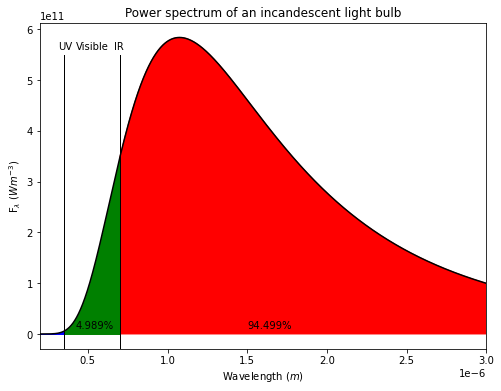

In [16]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6)
iir = l > 7000*10**-10
iiuv = l < 3500*10**-10
iivis = (l >= 3500*10**-10) & (l <= 7000*10**-10)
plt.plot(l, B, 'k')
plt.xlim(2000*10**-10, 30000*10**-10)
plt.xlabel(r"Wavelength ($m$)")
plt.ylabel('F$_\lambda$ ($Wm^{-3}$)')
plt.title('Power spectrum of an incandescent light bulb')
plt.fill_between(l[iir], y1 = B[iir], y2 = 0, color = 'red')
plt.fill_between(l[iiuv], y1 = B[iiuv], y2 = 0, color = 'blue')
plt.fill_between(l[iivis], y1 = B[iivis], y2 = 0, color = 'green')
plt.axvline(x = 7000*10**-10, ymin = 0.00, ymax = 0.9, color = 'k', lw = 1)
plt.axvline(x = 3500*10**-10, ymin = 0.00, ymax = 0.9, color = 'k', lw = 1)
plt.text(7000*10**-10 - 3.75*10**-8, 5.6*10**11, 'IR')
plt.text(3500*10**-10 - 3.75*10**-8, 5.6*10**11, 'UV')
plt.text(4600*10**-10 - 3.75*10**-8, 5.6*10**11, 'Visible')

a = 7000*10**-10
b = np.Inf
c = 3500*10**-10
I1 = np.pi*(quad(blambda, a, b)[0])
I2 = np.pi*(quad(blambda, c, a)[0])
Ptotal = 5.67*10**-8 *(2700**4)
print('Ratio of power emittied beyond 7000 Angstroms: ' +str(np.round((I1)/(Ptotal),3)))
print('Power needed to maintain the same visual brightness: ' +str(np.round(I2*60/Ptotal, 3)) +' W')

plt.text(4600*10**-10 - 3.75*10**-8, 0.1*10**11, str(np.round(100*I2/Ptotal, 3)) +'%')
plt.text(1.5*10**-6, 0.1*10**11, str(np.round(100*I1/Ptotal, 3)) +'%')
plt.savefig('/d/www/nikhil/public_html/ASTR5420/images/powerspectrum.png')

In [17]:
T = [4000, 10000, 40000]
U1 = ([np.sum([2*((i+1)**2)*(np.exp(-(13.6*1.6*10**-19*(1-(i+1)**-2))/(1.38*10**-23*T[ii])))\
               for i in range(5)]) for ii in range(len(T))])
print(U1)

[2.000000000001172, 2.000098716548728, 4.8881488672548095]


In [18]:
ne = 5*10**15
fI = [((100**-3)*(1/ne)*((2*np.pi*1.67*10**-27*1.38*10**-23*T[i])/((6.63*10**-34))**2)**1.5*((2)/(U1[i]))\
      *np.exp((-13.6*1.6*10**-19)/(1.38*10**-23*T[i])))**-1 for i in range(len(U1))]
print(fI)

[13780717.27349169, 0.00018636940977556038, 4.1626828878372964e-10]


In [19]:
Balmer = [(2*(2**2)*np.exp(-(13.6*1.6*10**-19*(1-(2)**-2))/(1.38*10**-23*T[i])))/U1[i] for i in range(len(T))]
print(Balmer)

[5.78161571296999e-13, 2.9243829831854417e-05, 0.0851029248427141]


In [20]:
Baltotal = [fI[i]*Balmer[i]/(1+fI[i]) for i in range(len(U1))]
print(Baltotal)

[5.781615293426132e-13, 5.449139752380198e-09, 3.5425648880020376e-11]


In [21]:
wavl, flux = np.loadtxt('/d/users/nikhil/Downloads/VegaSpectrum.txt', usecols=(0, 1), dtype = float, unpack = True)
Bmodel = (2*10**-8*6.63*10**-27*(3*10**10)**2)/(wavl*10**-8)**5/\
    (np.exp(6.63*10**-27*3*10**10/(wavl*10**-8*1.38*10**-16*11000))-1)

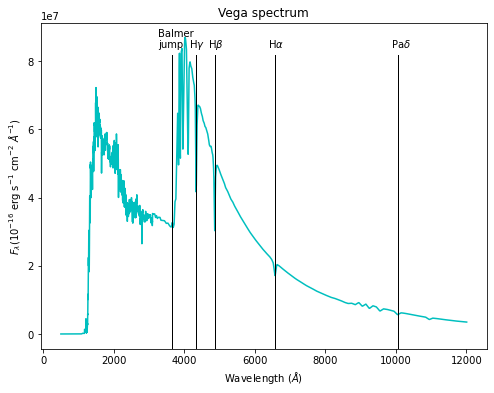

In [22]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6)
plt.plot(wavl, flux, 'c')
plt.xlabel(r'Wavelength ($\AA$)')
plt.axvline(x = 6563, ymin = 0.00, ymax = 0.9, color = 'k', lw = 1)
plt.axvline(x = 4861.35, ymin = 0.00, ymax = 0.9, color = 'k', lw = 1)
plt.axvline(x = 4340.472, ymin = 0.00, ymax = 0.9, color = 'k', lw = 1)
plt.axvline(x = 3646, ymin = 0.00, ymax = 0.9, color = 'k', lw = 1)
plt.axvline(x = 10050, ymin = 0.00, ymax = 0.9, color = 'k', lw = 1)
plt.text(6563-200, 8.4*10**7, r'H$\alpha$')
plt.text(4861.35-200, 8.4*10**7, r'H$\beta$')
plt.text(4340.472-200, 8.4*10**7, r'H$\gamma$')
plt.text(3646-400, 8.4*10**7, 'Balmer\njump')
plt.text(10050-200, 8.4*10**7, r'Pa$\delta$')
plt.ylabel(r'$F_\lambda (10^{-16}$ erg s$^{-1}$ cm$^{-2}$ $\AA^{-1})$')
plt.title('Vega spectrum')
plt.savefig('/d/www/nikhil/public_html/ASTR5420/images/vegaspec.png')

In [23]:
Boloflux = np.trapz(flux, wavl)
print('Bolometric Flux: ' +str(Boloflux*10**-16) +' erg/scm^2')
print('Vega Luminosity: ' +str(np.round(Boloflux*10**-16*4*np.pi*(7.7*3.08*10**18)**2,3)) +' erg/s')
print('Vega Luminosity: ' +str(np.round(Boloflux*10**-16*4*np.pi*(7.7*3.08*10**18)**2/(3.828*10**33),3)) +' L')

Bolometric Flux: 2.8059084627476708e-05 erg/scm^2
Vega Luminosity: 1.9831987785892643e+35 erg/s
Vega Luminosity: 51.808 L


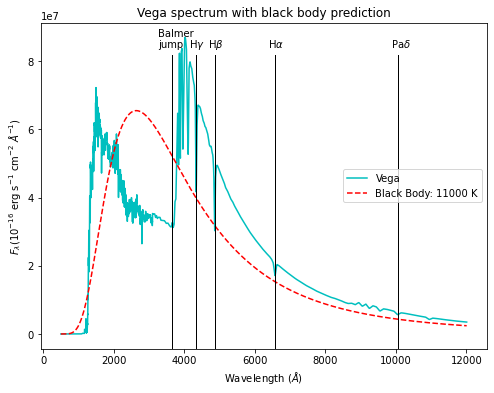

In [24]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6)
plt.plot(wavl, flux, 'c', label = 'Vega')
plt.plot(wavl, Bmodel, '--r', label = 'Black Body: 11000 K')
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel(r'$F_\lambda (10^{-16}$ erg s$^{-1}$ cm$^{-2}$ $\AA^{-1})$')
plt.axvline(x = 6563, ymin = 0.00, ymax = 0.9, color = 'k', lw = 1)
plt.axvline(x = 4861.35, ymin = 0.00, ymax = 0.9, color = 'k', lw = 1)
plt.axvline(x = 4340.472, ymin = 0.00, ymax = 0.9, color = 'k', lw = 1)
plt.axvline(x = 3646, ymin = 0.00, ymax = 0.9, color = 'k', lw = 1)
plt.axvline(x = 10050, ymin = 0.00, ymax = 0.9, color = 'k', lw = 1)
plt.text(6563-200, 8.4*10**7, r'H$\alpha$')
plt.text(4861.35-200, 8.4*10**7, r'H$\beta$')
plt.text(4340.472-200, 8.4*10**7, r'H$\gamma$')
plt.text(3646-400, 8.4*10**7, 'Balmer\njump')
plt.text(10050-200, 8.4*10**7, r'Pa$\delta$')
plt.legend()
plt.title('Vega spectrum with black body prediction')
plt.savefig('/d/www/nikhil/public_html/ASTR5420/images/vegaspecblackbody.png')

In [26]:
Tvega = 11000
R = ((Boloflux*10**-16*4*np.pi*(7.7*3.08*10**18)**2)/(4*np.pi*Tvega**4*5.67*10**-5))**.5
print('Radius: ' +str(R) +' cm')
print('Radius: ' +str(R/(6.957*10**10)) +' Rsun')

Radius: 137880005280.84537 cm
Radius: 1.9818888210557046 Rsun


3.14591999169175e-06
3.397404892615517e-06


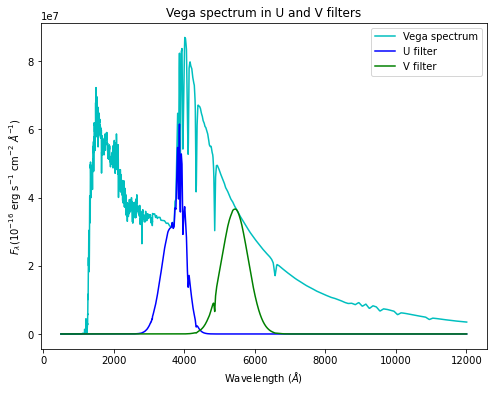

In [27]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6)
U = np.exp(-(wavl-3650)**2/(2*280**2))
V = np.exp(-(wavl-5510)**2/(2*370**2))
plt.plot(wavl, flux, 'c', label = 'Vega spectrum')
plt.plot(wavl, U*flux, 'b', label = 'U filter')
plt.plot(wavl, V*flux, 'g', label = 'V filter')
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel(r'$F_\lambda (10^{-16}$ erg s$^{-1}$ cm$^{-2}$ $\AA^{-1})$')
plt.title('Vega spectrum in U and V filters')
plt.legend()
Uflux = np.trapz(U*flux, wavl)*10**-16
Vflux = np.trapz(V*flux, wavl)*10**-16
print(Uflux)
print(Vflux)
plt.savefig('/d/www/nikhil/public_html/ASTR5420/images/vegauvflux.png')

3.665109203821643e-06
2.2578794052972956e-06


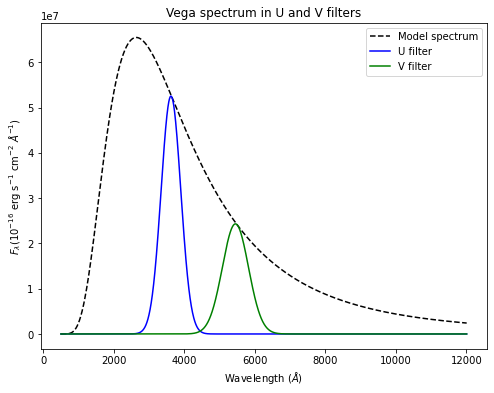

In [28]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6)
U = np.exp(-(wavl-3650)**2/(2*280**2))
V = np.exp(-(wavl-5510)**2/(2*370**2))
plt.plot(wavl, Bmodel, '--k', label = 'Model spectrum')
plt.plot(wavl, U*Bmodel, 'b', label = 'U filter')
plt.plot(wavl, V*Bmodel, 'g', label = 'V filter')
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel(r'$F_\lambda (10^{-16}$ erg s$^{-1}$ cm$^{-2}$ $\AA^{-1})$')
plt.title('Vega spectrum in U and V filters')
plt.legend()
Uflux = np.trapz(U*Bmodel, wavl)*10**-16
Vflux = np.trapz(V*Bmodel, wavl)*10**-16
print(Uflux)
print(Vflux)
plt.savefig('/d/www/nikhil/public_html/ASTR5420/images/blackbodyuvflux.png')